# Esercizio 1

Il tempo di vita di un dispositivo meccanico sottoposto a vibrazioni durante un test segue una
distribuzione esponenziale con media 400 ore.

1. Qual `e la probabilit`a che il dispositivo fallisca il test in meno di 100 ore?
2. Qual `e la probabilit`a che il dispositivo operi per pi`u di 500 ore prima di rompersi?
3. Sapendo che il dispositivo ha operato per 400 ore senza fallire il test, qual `e la probabilit`a che
   fallisca nelle prossime 100 ore?
4. Quante ore di funzionamento sono necessarie per affermare che il dispositivo fallisca il test con
   probabilit`a superiore al 95%


In [550]:
# Punto 1
from scipy.stats import expon

media = 400
punto1 = expon.cdf(100, 0, media)
print(punto1)

0.22119921692859515


In [551]:
# Punto 2
from scipy.stats import expon

punto2 = 1 - expon.cdf(500, 0, media)
print(punto2)

0.28650479686019015


In [552]:
# Punto 3
from scipy.stats import expon

punto3 = 1 - expon.cdf(300, 0, media)
print(punto3)

0.4723665527410147


In [553]:
# Punto 4
from scipy.stats import expon

media = 400

print(
    "Le ore di funzionamento che sono necessarie per affermare che il dispositivo fallisca il test con probabilità superiore al 95% sono :",
    expon.ppf(0.95, 0, media),
)

Le ore di funzionamento che sono necessarie per affermare che il dispositivo fallisca il test con probabilità superiore al 95% sono : 1198.292909421596


# Esercizio 2

Si ritiene che i grammi di solidi rimossi da un materiale (y) siano correlati al tempo di asciugatura
(x) espresso in ore. Da uno studio sperimentale si ottengono le 10 misurazioni riportate nella seguente
tabella.

x 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0

y 4.3 1.5 1.8 4.9 4.2 4.8 5.8 6.2 7.0 7.9

1. Si determinino i coefficienti della retta di regressione e i loro intervalli di confidenza al 95%. Si
   calcoli il coefficiente di determinazione.
2. Si rappresentino i dati e la retta di regressione in uno stesso grafico.
3. Si stimi la quantità in grammi di solidi rimossi a 4.25 ore.
4. Si effettui il test di indipendenza con un livello di significativit`a α = 0.05 commentandone l’esito


In [554]:
# Punto 1
import numpy as np

X = np.array([2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
Y = np.array([4.3, 1.5, 1.8, 4.9, 4.2, 4.8, 5.8, 6.2, 7.0, 7.9])

x_bar = np.mean(X)
y_bar = np.mean(Y)
n = X.size

sig_bar_xy = np.sum((X - x_bar) * (Y - y_bar)) / n
sig_bar_x2 = np.sum((X - x_bar) ** 2) / n

b0 = y_bar - sig_bar_xy / sig_bar_x2 * x_bar
b1 = sig_bar_xy / sig_bar_x2

# valori stimati
y_hat = b0 + b1 * X
r = Y - y_hat
s2 = np.sum(r**2) / (n - 2)

# Intervalli di confidenza al 95%
from scipy.stats import t

alpha = 0.05
s = np.sqrt(s2)
T = t.ppf(1 - alpha / 2, (n - 2))

sig_x = np.sqrt(sig_bar_x2)

b_0_sx = b0 - s * np.sqrt(1 / n + x_bar**2 / (n * sig_bar_x2)) * T
b_0_dx = b0 + s * np.sqrt(1 / n + x_bar**2 / (n * sig_bar_x2)) * T

b_1_sx = b1 - s / (sig_x * np.sqrt(n)) * T
b_1_dx = b1 + s / (sig_x * np.sqrt(n)) * T


print("Intervallo di confidenza di b_0: [{},{}]".format(b_0_sx, b_0_dx))
print("Intervallo di confidenza di b_1: [{},{}]".format(b_1_sx, b_1_dx))

# Coefficente di determinazione
sig_y_2 = np.sum((Y - y_bar) ** 2) / n
R2 = sig_bar_xy**2 / (sig_bar_x2 * sig_y_2)
print("Coefficiente di determinazione: ", R2)

Intervallo di confidenza di b_0: [-3.4961586033066223,2.098582845730862]
Intervallo di confidenza di b_1: [0.6023426015180314,1.729778610603181]
Coefficiente di determinazione:  0.7398627473553604


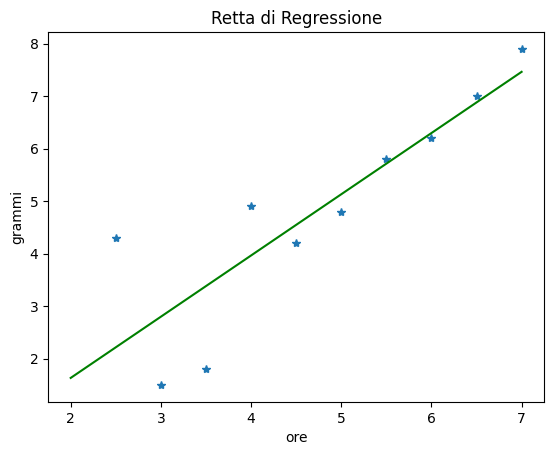

In [555]:
# Punto 2

import matplotlib.pyplot as plt

min = np.round(np.min(X))
max = np.round(np.max(X))
assex = np.linspace(min, max, 1000)
assey = b0 + b1 * assex

plt.plot(X, Y, "*")
plt.plot(assex, assey, color="green")
plt.xlabel("ore")
plt.ylabel("grammi")
plt.title("Retta di Regressione")
plt.show()

In [556]:
# Punto 3

punto3 = b0 + b1 * 4.25
print(punto3)

4.256969696969697


In [557]:
# Punto 4
from scipy.stats import t

alpha = 0.05

t = t.ppf(1 - alpha / 2, n - 2)
T = np.abs(np.sqrt(n) * b1 / s * sig_x)
print("T0 : ", T)
print("t:", t)
print("Siccome T0>t possiamo rigettare l'ipotesi")

T0 :  4.770010107193931
t: 2.3060041350333704
Siccome T0>t possiamo rigettare l'ipotesi


# Esercizio 3


In [558]:
import numpy as np

def fun(x):
    return (-3 / 4) * (x**2) + 3 / 2 * x

def rigetto(a, b, M):
    while True:
        r1 = np.random.rand()
        r2 = np.random.rand()
        xi = a + r1 * (b - a)
        eta = M * r2
        if eta <= fun(xi):
            break
    return xi

def find_maximum(a, b):
    fa = fun(a)
    fb = fun(b)
    maximum_value = max(fa, fb)  # Rename M to maximum_value or any other name
    return maximum_value

a = 0
b = 2
Maximum=2
N = 100000
X = np.zeros(N)
for i in range(N):
    X[i] = rigetto(a, b, Maximum)


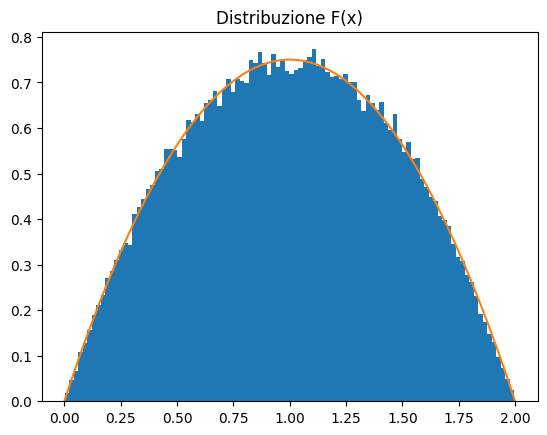

In [559]:
assex = np.linspace(a, b, 100000)
assey = fun(assex)

plt.hist(X, bins=100, density=True)
plt.plot(assex, assey)
plt.title("Distribuzione F(x)")
plt.show()